### Widzenie komputerowe - Projekt 1 - Problem: Object re-lighting


Autorzy: 

Ewa Komkowska (136737)

Aleksander Iżemski (150659)

Emilia Maciejewska (136764)  

# Zaimportowanie bibliotek


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import plotly.graph_objects as go
import json
import os
import copy
%matplotlib inline

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab.patches import cv2_imshow
  imshow = cv2_imshow
else:
  def imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
      if a.shape[2] == 4:
        a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
      else:
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))

# Pobieranie obrazów

In [ ]:
!wget -O bronze.zip https://grail.cs.washington.edu/projects/photomontage/data/bronze.zip
!unzip -o bronze.zip 

--2021-04-15 11:21:32--  https://grail.cs.washington.edu/projects/photomontage/data/bronze.zip
Resolving grail.cs.washington.edu (grail.cs.washington.edu)... 128.208.5.93, 2607:4000:200:14::5d
Connecting to grail.cs.washington.edu (grail.cs.washington.edu)|128.208.5.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328148 (320K) [application/zip]
Saving to: ‘bronze.zip’

bronze.zip          100%[===================>] 320.46K  --.-KB/s    in 0.1s    

2021-04-15 11:21:33 (2.09 MB/s) - ‘bronze.zip’ saved [328148/328148]

Archive:  bronze.zip
  inflating: IMG_3083.JPG            
  inflating: IMG_3084.JPG            
  inflating: IMG_3085.JPG            
  inflating: IMG_3086.JPG            
  inflating: IMG_3087.JPG            
  inflating: IMG_3088.JPG            
  inflating: IMG_3089.JPG            
  inflating: IMG_3090.JPG            
  inflating: IMG_3091.JPG            
  inflating: IMG_3092.JPG            
  inflating: IMG_3093.JPG            
  inflati

# Ładowanie zasobów do zmiennych

In [ ]:
files = []
result = cv2.imread('./result.png')
for i in range(83,99):
  files.append(cv2.imread('./IMG_30{}.JPG'.format(i)))

#Przedstawienie obrazów wejściowych i wyniku, który chcemy osiągnąć 
Obrazami wejściowymi są zdjęcia figurki z brązu wykonane przy różnym ustawieniu lampy biurowej. 

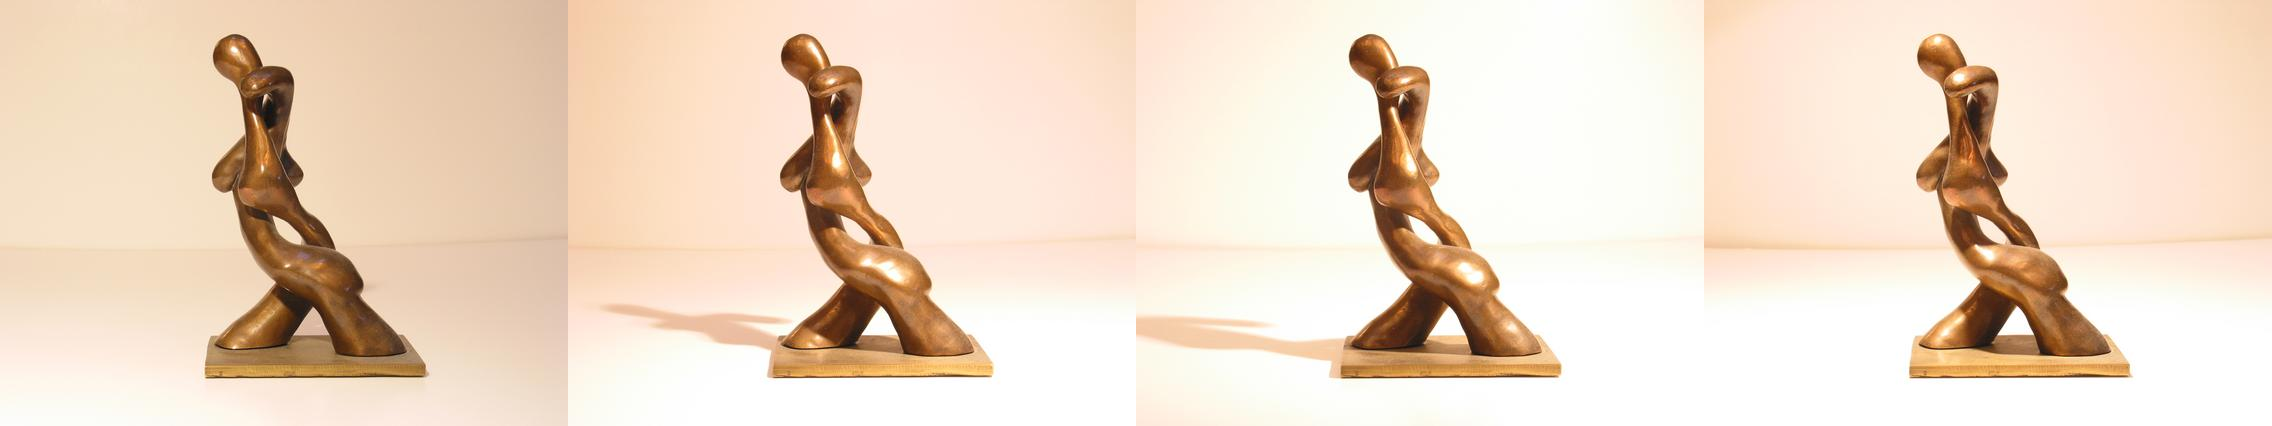

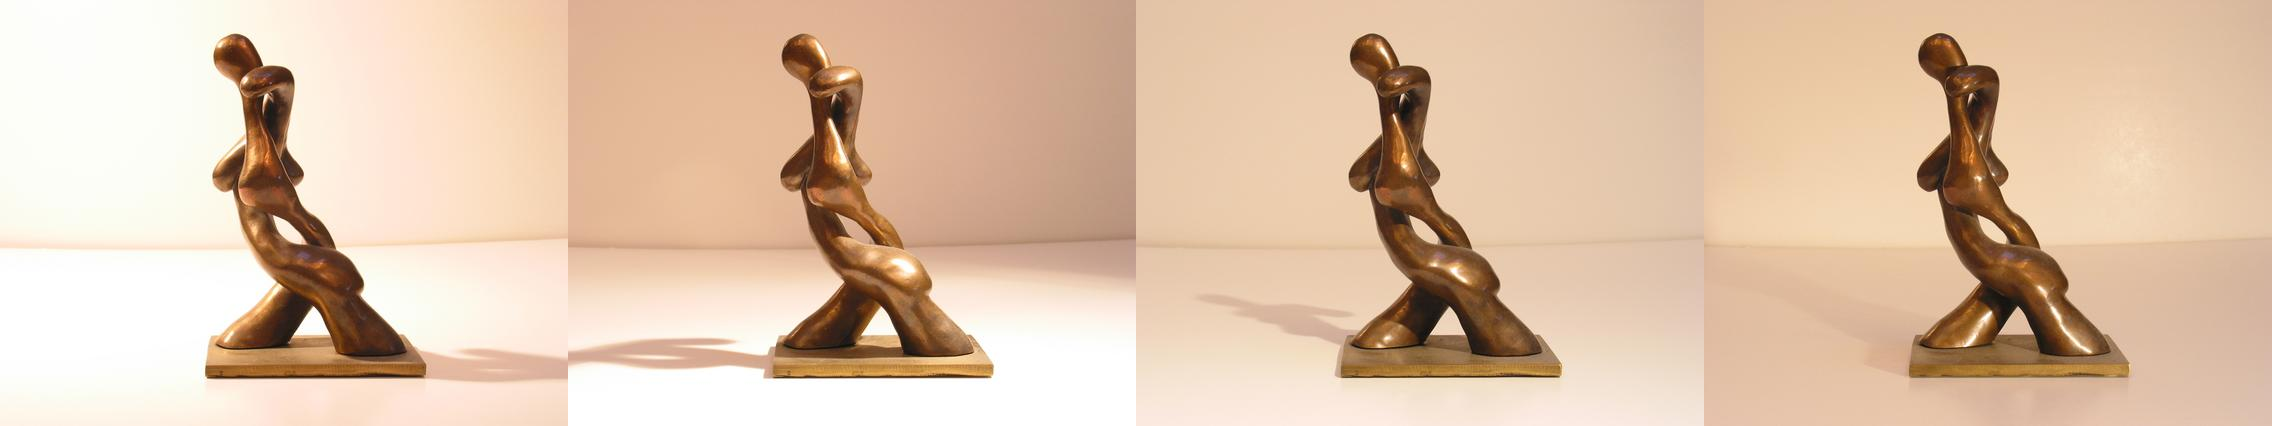

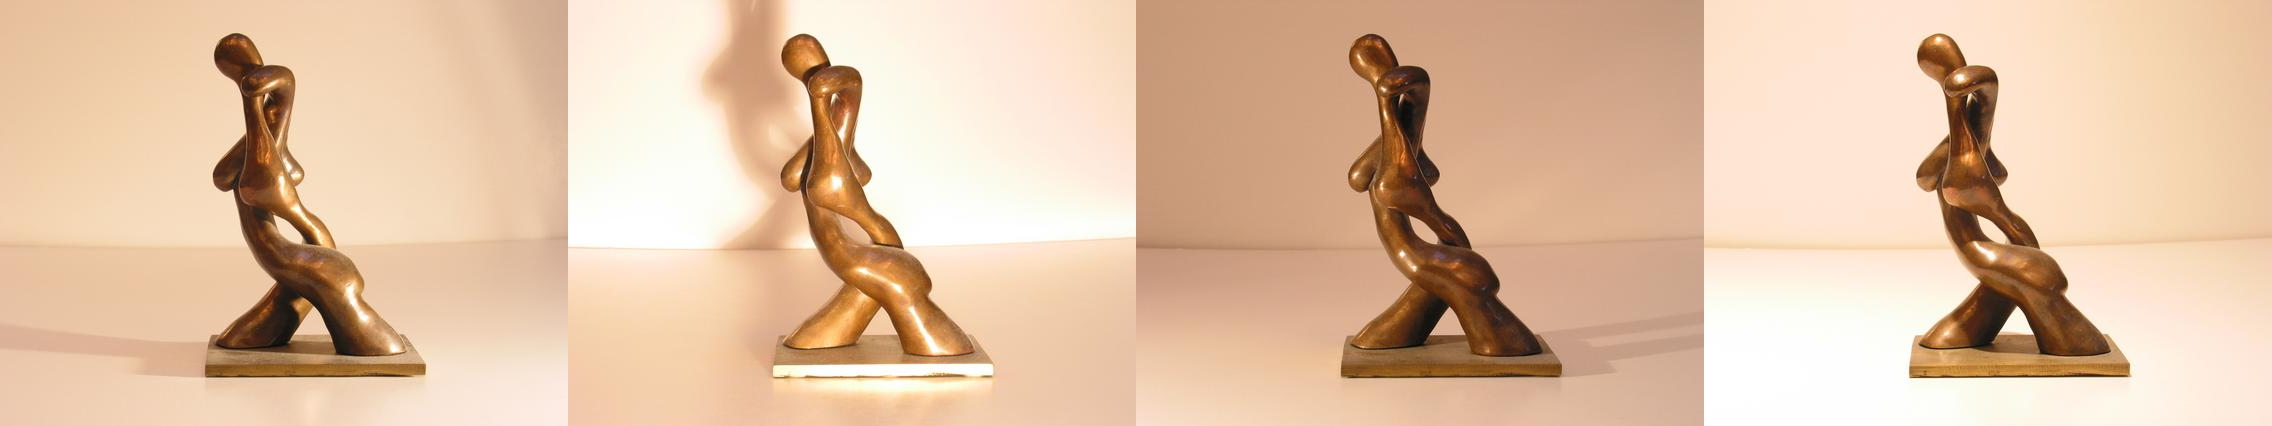

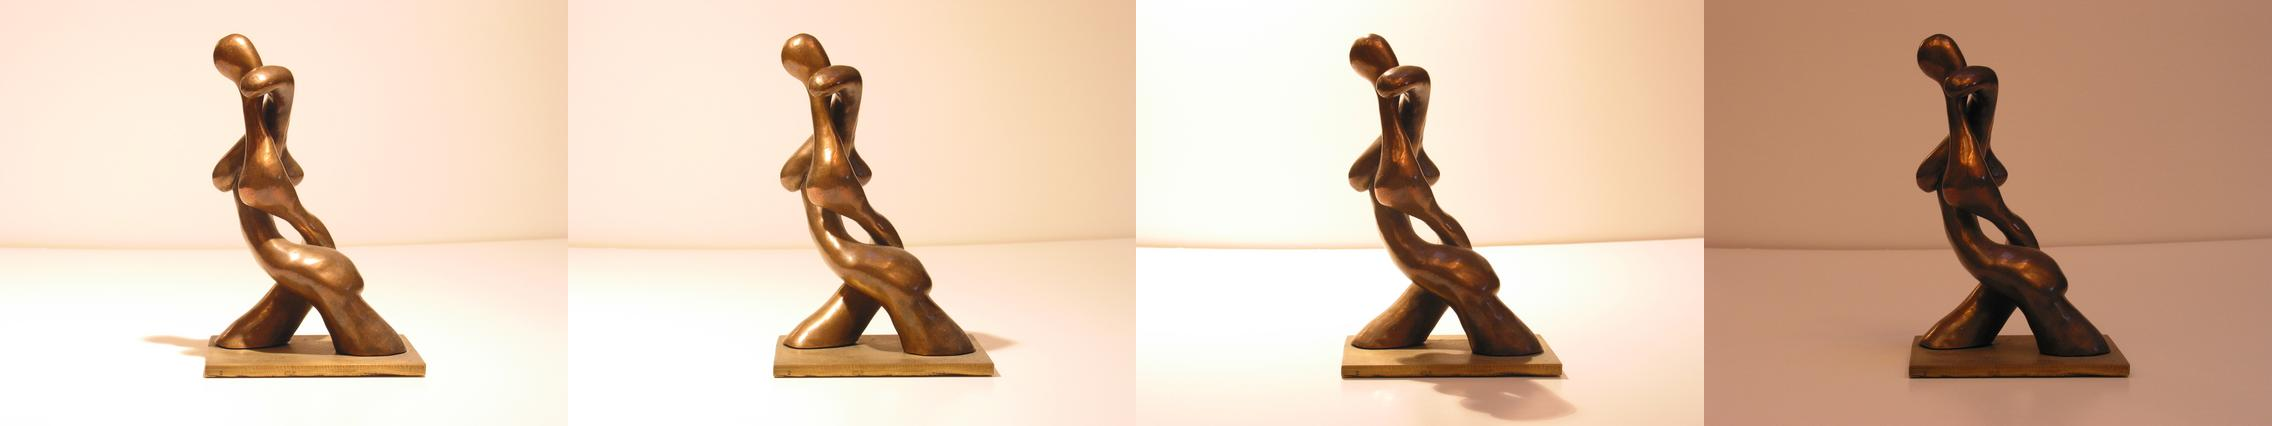

In [ ]:
imshow(np.concatenate(files[0:4], 1))
imshow(np.concatenate(files[4:8], 1))
imshow(np.concatenate(files[8:12], 1))
imshow(np.concatenate(files[12:16], 1))

Oczekiwany rezultat - obraz powstały przez złożenie obrazów wejściowych wybierając najbardziej odpowiednio oświetlone fragmenty obrazów

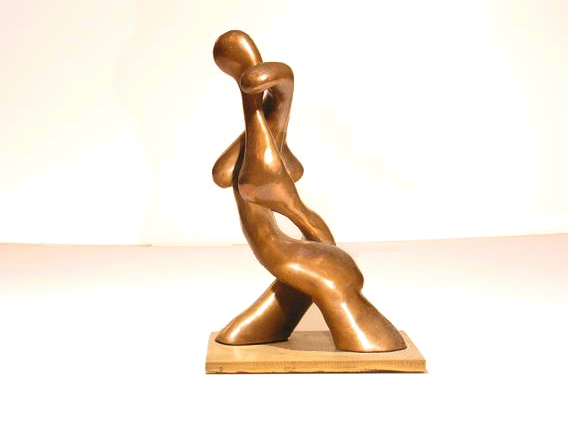

In [ ]:
imshow(result)

# Rysowanie histogramu dla poszczególnych obrazów

Linie pionowe wyznaczają:
- czerwona - średnia
- czarne - odchylenie standardowe

Obraz 0 Średnia 200.37565711168418 Odchylenie 50.64225005072913


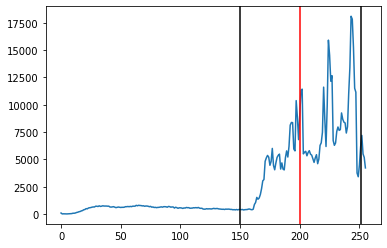

Obraz 1 Średnia 219.06619332583924 Odchylenie 49.31265080301093


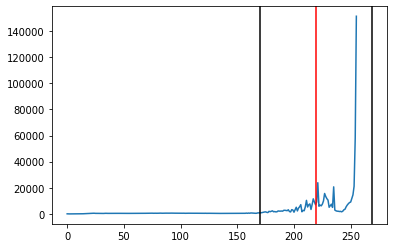

Obraz 2 Średnia 230.5974329938945 Odchylenie 51.17921470328641


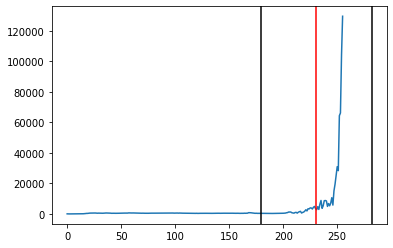

Obraz 3 Średnia 223.23980581454296 Odchylenie 50.34046980041455


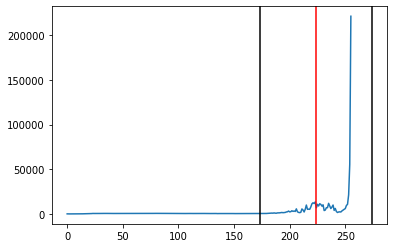

Obraz 4 Średnia 219.21785387599462 Odchylenie 57.58501295553889


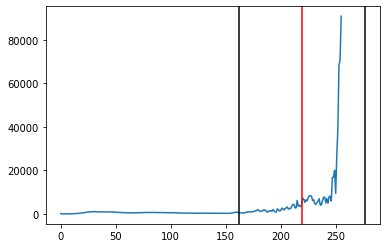

Obraz 5 Średnia 187.25898879190638 Odchylenie 54.97828686855383


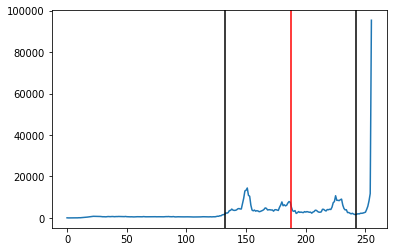

Obraz 6 Średnia 190.2640404240781 Odchylenie 50.81064319267499


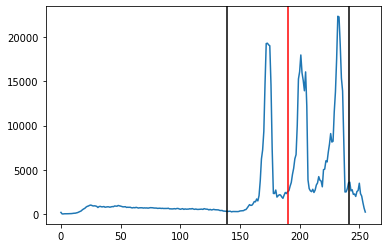

Obraz 7 Średnia 183.4445505190769 Odchylenie 49.71284771328433


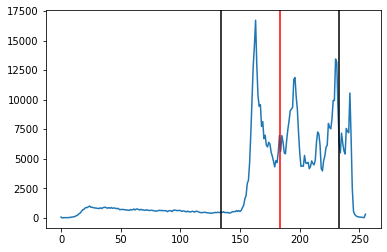

Obraz 8 Średnia 191.657738488836 Odchylenie 51.21633511419098


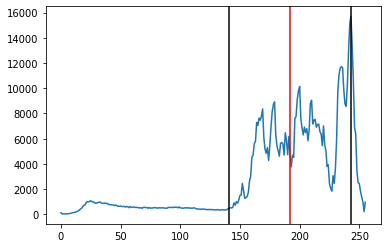

Obraz 9 Średnia 212.41258348211335 Odchylenie 48.67458443771521


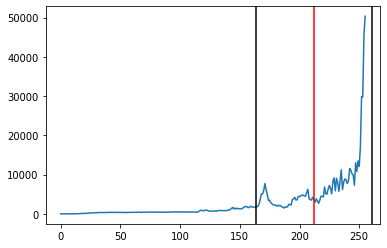

Obraz 10 Średnia 160.6405847054156 Odchylenie 49.058289385608106


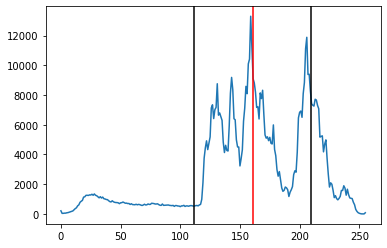

Obraz 11 Średnia 211.98930299323325 Odchylenie 55.07005888859058


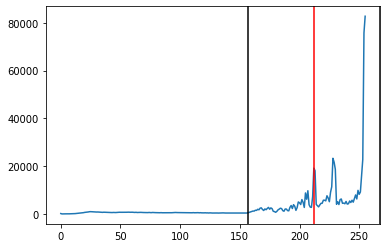

Obraz 12 Średnia 220.68051285018404 Odchylenie 53.44711633525171


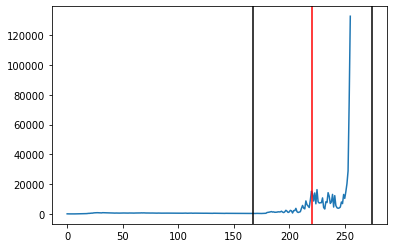

Obraz 13 Średnia 215.00756573872027 Odchylenie 53.68226692502322


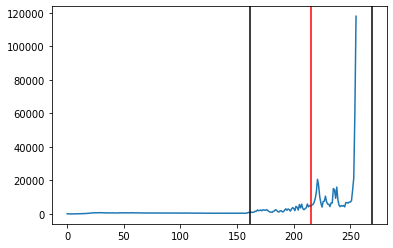

Obraz 14 Średnia 214.7534054089797 Odchylenie 61.98369694273134


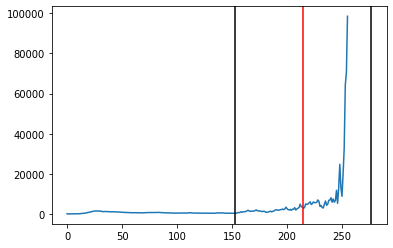

Obraz 15 Średnia 131.7639371046309 Odchylenie 47.073410819312635


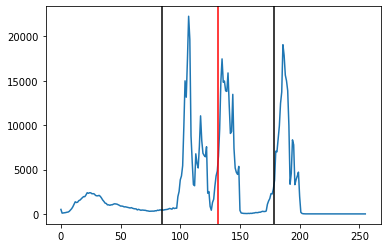

In [ ]:
def count(arr):
  res = np.zeros(256)
  res = np.array(list(map(lambda x: (np.count_nonzero(arr == x[0])) ,enumerate(res))))
  return res


v_data = [a for a in files]
v_histograms = [count(a) for a in v_data]

for i in range(1,len(v_histograms)+1):
    plt.plot(v_histograms[i-1])
    mean = np.mean(v_data[i-1])
    std = np.std(v_data[i-1])
    plt.axvline(x=mean ,color='r')
    plt.axvline(x=mean+std ,color='k')
    plt.axvline(x=mean-std ,color='k')
    print('Obraz',i-1,'Średnia', mean,"Odchylenie",std) 

    plt.show()


# Przetwarzanie na bazie histogramów
W tej sekcji został stworzony obraz poprzez uśrednienie wybranych danych wejściowych ze średnią na histogramie powyżej 200. Dzięki takiej operacji otrzymaliśmy obraz bez cienia oraz trochę jaśniejszy niż przy wzięciu średniej ze wszystkich obrazów.

 Obraz średni | Obraz średni na podstawie histogramów | Obraz, który chcemy osiągnąć


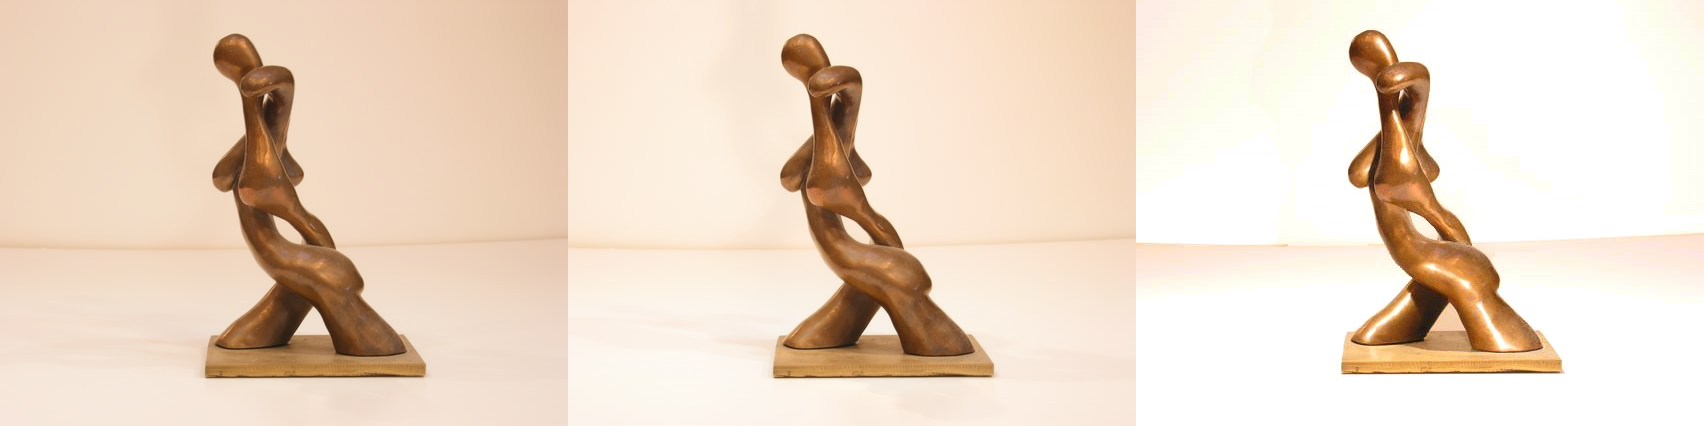

In [ ]:
tmp = np.array([files[0],files[1],files[2],files[3],files[4],files[9],files[11],files[12],files[13],files[14]])

res = np.mean(tmp,axis=0)

print(" Obraz średni | Obraz średni na podstawie histogramów | Obraz, który chcemy osiągnąć")
imshow(np.concatenate([np.mean(files,axis=0),res,result],1) )

# Przetwarzanie w skali szarości

Ta część programu zawiera przekształcenie uzyskanego rezultatu na skalę szarości. Następnie następuje stworzenie maski zawierającej wartości pikseli mniejsze od 200. Kolejnym krokiem jest przemnożenie odwrotności uzyskanej maski przez dotychczasowy obraz, co daje nam możliwość dokonania zmian w jaśniejszych pikselach. Na koniec przekształcamy obraz ponownie do wartości RGB uważając przy tym, aby sumowane wartości nie przekroczyły maksymalnej wartości koloru równej 255.

 Obraz po przetworzeniu | Obraz średni na podstawie histogramów | Obraz, który chcemy osiągnąć


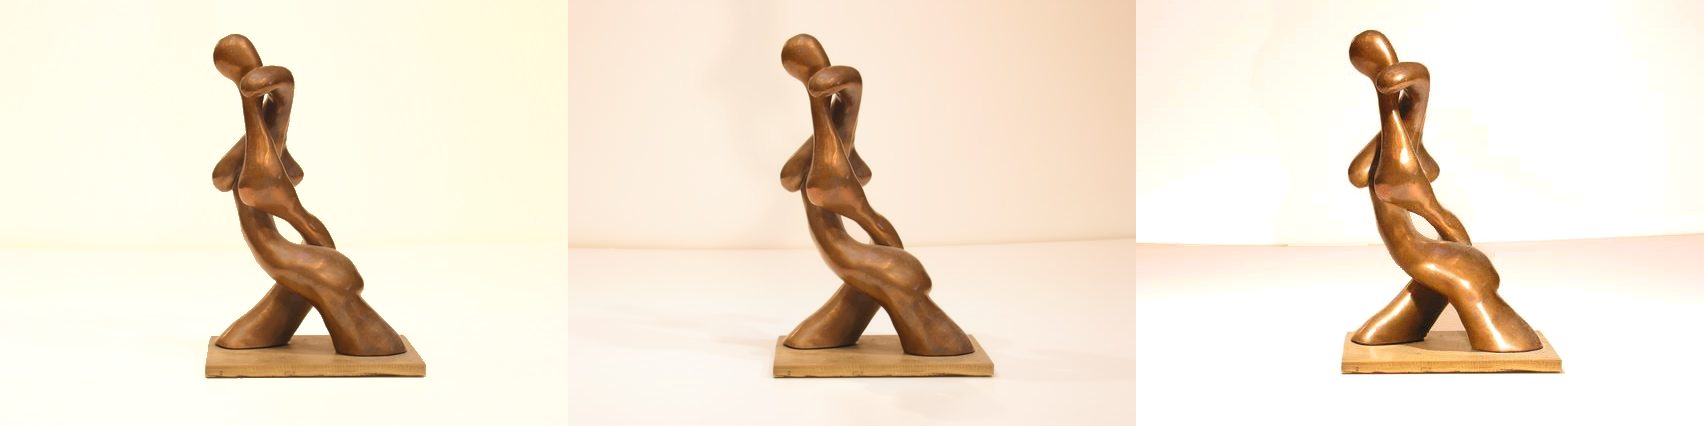

In [ ]:
grey_img = cv2.cvtColor(res.astype('uint8'), cv2.COLOR_BGR2GRAY)

grey_img[grey_img < 200] = 0
mask = np.array([grey_img < 1]).astype('uint8')[0]

grey_img = grey_img * (1 - mask)
my_res = 200 - (cv2.cvtColor(grey_img, cv2.COLOR_GRAY2RGB) + 200 - res) 

print(" Obraz po przetworzeniu | Obraz średni na podstawie histogramów | Obraz, który chcemy osiągnąć")
imshow(np.concatenate([my_res, res, result],1))

# Dodanie odbicia światła do statuetki

Obraz otrzymany w poprzednim kroku jest obrazem w pewien sposób uśrednionym. Figurka na tym obrazie charakteryzuje się mniej widocznymi odbiciami światła. W tym kroku spróbowaliśmy dodać odbicia światła do figurki.

W pierwszym kroku wybraliśmy obraz, który jest średnio najjaśniejszy ze wszystkich obrazów wejściowych oraz obraz średnio najciemniejszy.

Obraz najciemniejszy | Obraz najjaśniejszy


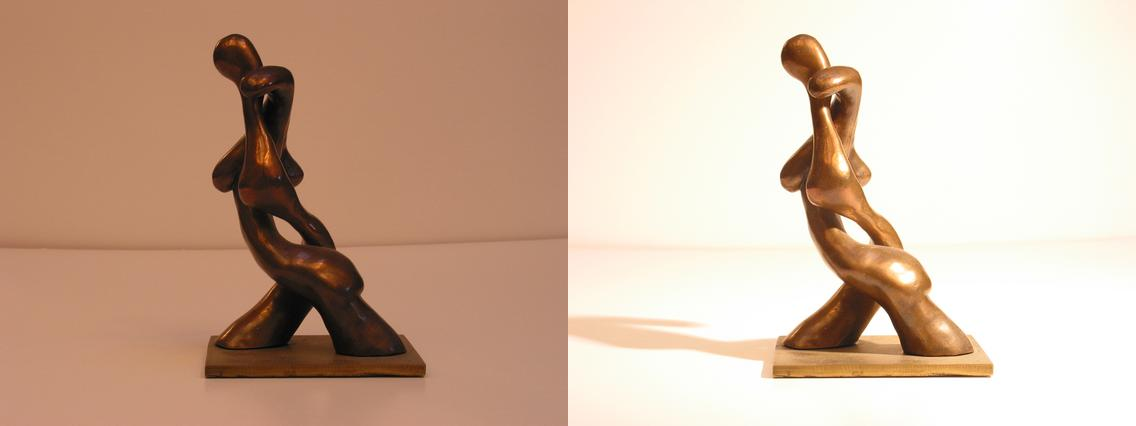

In [ ]:
max_sum = np.inf
max_sum_image = []

min_sum = 0
min_sum_image = []

for im in files:
  if np.sum(im) > min_sum:
    min_sum = np.sum(im) 
    min_sum_image = copy.deepcopy(im)
  if np.sum(im) < max_sum:
    max_sum = np.sum(im)
    max_sum_image = copy.deepcopy(im)

print("Obraz najciemniejszy | Obraz najjaśniejszy")
imshow(np.concatenate([max_sum_image, min_sum_image], 1))  

Obraz najciemniejszy posłużył do stworzenia maski odróżniającej figurkę od tła. Wybrany został obraz najciemniejszy, aby zminimalizować ryzyko, że odbicia światła na figurce zostaną uznane za fragmenty tła. <br /> Aby stworzyć maskę obraz został przekształcony do skali grayscale. Następnie wszystkie piksele o wartości mniejszej od progu 100 zostały uznane za fragmenty obiektu (figurki). Na tak przygotowanym obrazie zastosowano zamknięcie właściwe aby wyszczególnić obszar jednolity i "pozbyć się" ewentualnych miejsc, w któych fragmenty mocno oświetlone zostaną uznane za tło.

Maska grayscale | Obraz po operacji zamknięcia właściwego


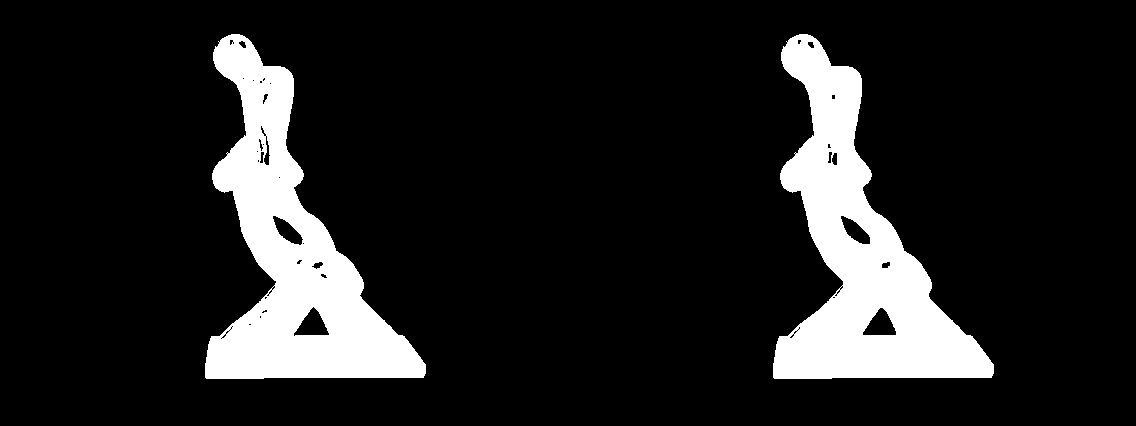

In [ ]:
img_grayscale = cv2.cvtColor(max_sum_image, cv2.COLOR_BGR2GRAY)
img_raw = (img_grayscale < 100).astype(np.uint8) * 255

struct = np.ones([3, 3], np.uint8)
img_space_open = cv2.morphologyEx(img_raw, cv2.MORPH_OPEN, struct)
img_space_close = cv2.morphologyEx(img_space_open, cv2.MORPH_CLOSE, struct)
img_space_open2 = cv2.morphologyEx(img_space_close, cv2.MORPH_OPEN, struct)
img_space_G = np.maximum(img_raw, img_space_open2)

print("Maska grayscale | Obraz po operacji zamknięcia właściwego")
imshow(np.concatenate([img_raw, img_space_G], 1)) 

W celu znalezienia najjaśniejszych fragmentów obrazów, wszystkie obrazy zostały przekształcone do przestrzeni barw HSV. Piksele należace do figurki, których jasność była większa (wartość V w modelu HSV) zostały zamienione w wybranym wcześniej najjaśniejszym obrazie. Dla tła wybrane zostały piksele, które suma wartości barw danego piksela w przestrzni BGR była większa.

Najjaśniejszy obraz wejściowy | Obraz po złożeniu najjaśniejszych fragmentów | Obraz, który chcemy osiągnąć


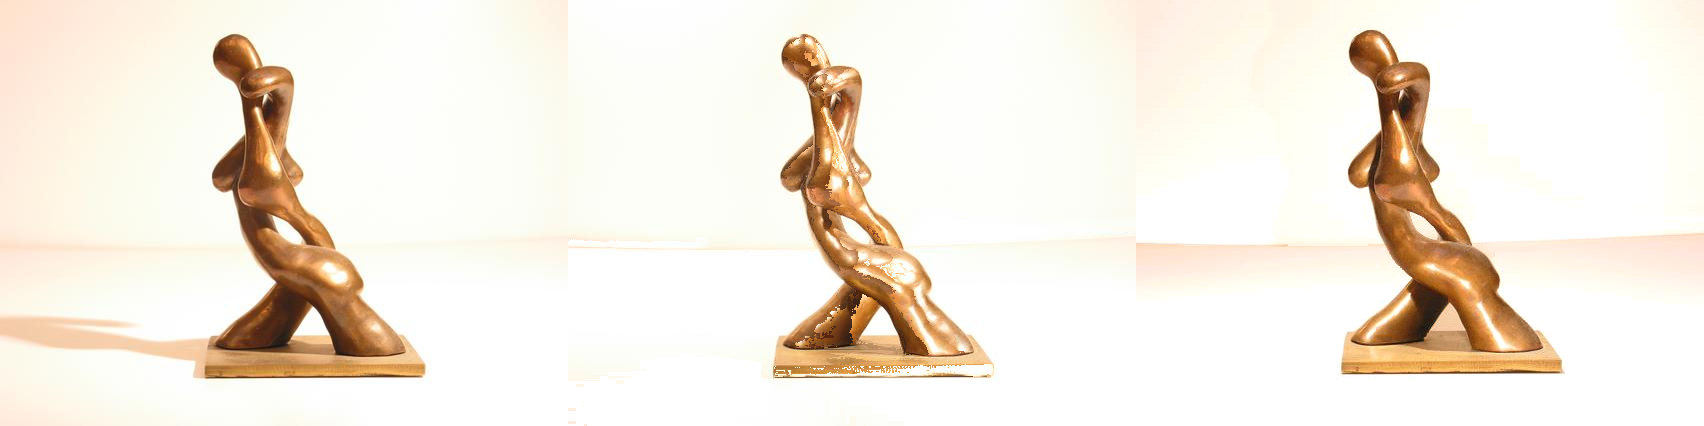

In [ ]:
def changeToHsv(img):
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  return img_hsv

min_sum_image_hsv = cv2.cvtColor(min_sum_image, cv2.COLOR_BGR2HSV)
bronze_hsv = list(map(changeToHsv, files))

image_with_light = copy.deepcopy(min_sum_image)

counter = 0
for image_hsv in bronze_hsv:
  for i in range(image_hsv.shape[0]):
    for j in range(image_hsv.shape[1]):
      if image_hsv[i][j][2] > min_sum_image_hsv[i][j][2] and img_space_G[i][j] > 0 :
        image_with_light[i][j] = np.copy(files[counter][i][j])
      elif np.sum(files[counter][i][j]) > np.sum(min_sum_image[i][j]) and img_space_G[i][j] == 0:
        image_with_light[i][j] = np.copy(files[counter][i][j])
  counter += 1

print("Najjaśniejszy obraz wejściowy | Obraz po złożeniu najjaśniejszych fragmentów | Obraz, który chcemy osiągnąć")
imshow(np.concatenate([min_sum_image, image_with_light, result], 1)) 

Tak przygotowany obraz posłużył nam do stworzenia maski wyróżniającej miejsca gdzie znajduje się najwięcej odbitego światła. Obraz zmieniony został na skalę szarości, a następnie wyszczególniono najjaśniejsze obszary.

Maska wyróżniająca odbicia


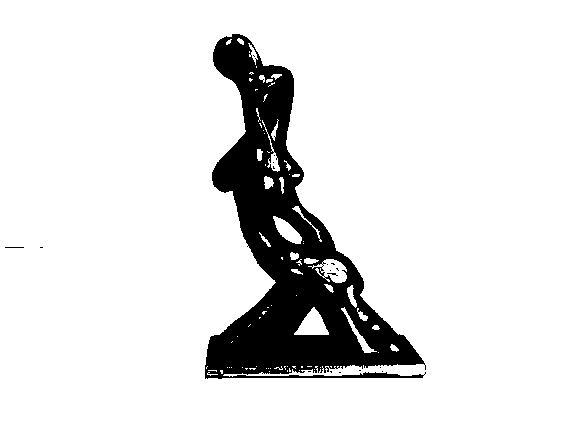

In [ ]:
img_grayscale_x = cv2.cvtColor(image_with_light, cv2.COLOR_BGR2GRAY)

img_raw_res = (img_grayscale_x > 235).astype(np.uint8) * 255

print("Maska wyróżniająca odbicia")
imshow(img_raw_res)

W celu przygotowania ostatecznego obrazka wykonaliśmy następujące kroki:
- aby stworzony przez nas obraz skłądający się z najjaśniejszych fragmentów wyglądał bardziej realnie uśredniliśmy go z wybranym na początku najjaśniejszym obrazkiem
- następnie w miejscach, gdzie maska wyróżniająca odbicia wskazywała najjaśniejsze punkty zostały wybrane piksele z obrazka opisanego w poprzedniej kropce, w pozostałych miejscach pozostawiliśmy obraz średni powstały w poprzedniej sekcji
- tło zostało wybrane z najjaśniejszego obrazka, aby mieć pewność, że pozbyliśmy się wszystkich cieni

Najjaśniejszy obraz wejściowy uśredniony z obrazem po złożeniu najjaśniejszych fragmentów | Obraz średni powstały w poprzedniej sekcji | Obraz wyjściowy | Obraz, który chcemy osiągnąć


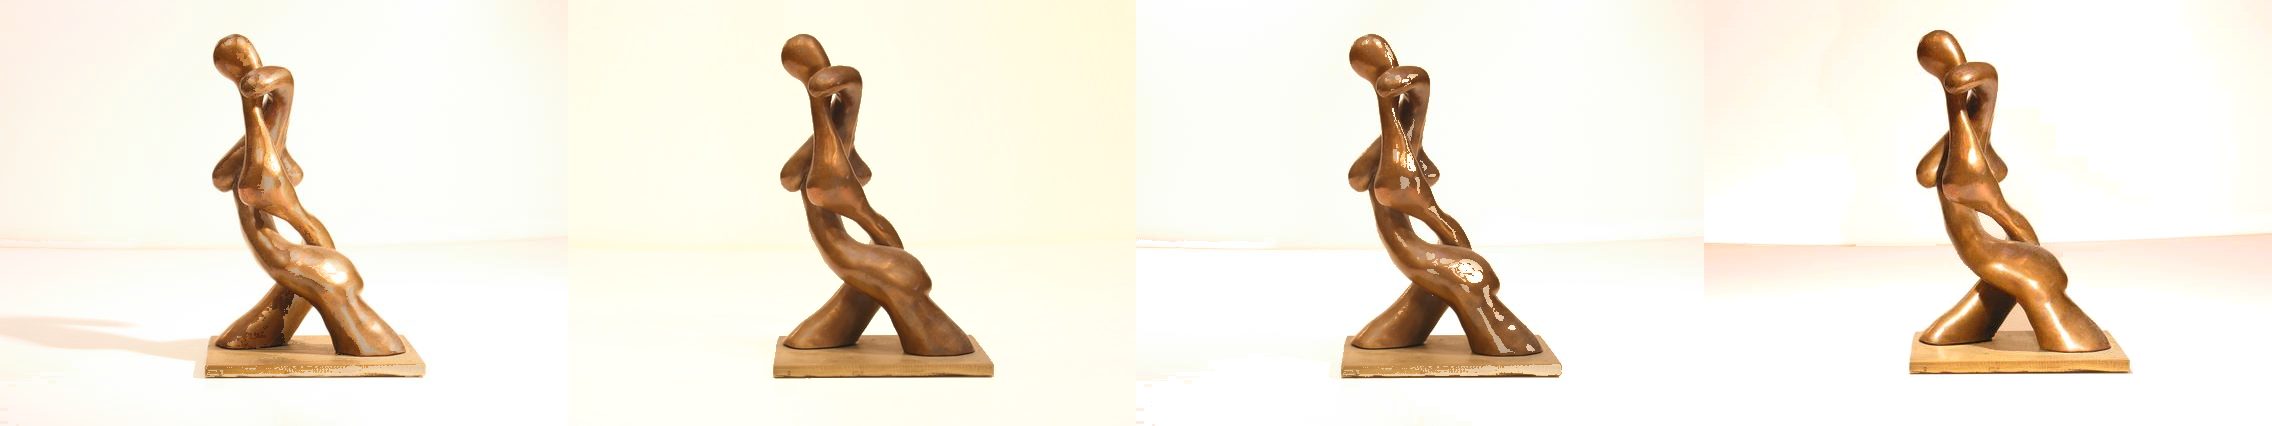

In [ ]:
final_array = [image_with_light, min_sum_image]
final = np.mean(final_array, axis=0)

final_image = copy.deepcopy(my_res)
for i in range(final_image.shape[0]):
  for j in range(final_image.shape[1]):
    if img_raw_res[i][j] > 0 and img_space_G[i][j] > 0:
      final_image[i][j] = final[i][j]
    if img_space_G[i][j] == 0:
      final_image[i][j] = image_with_light[i][j]

print("Najjaśniejszy obraz wejściowy uśredniony z obrazem po złożeniu najjaśniejszych fragmentów | Obraz średni powstały w poprzedniej sekcji | Obraz wyjściowy | Obraz, który chcemy osiągnąć")
imshow(np.concatenate([final, my_res, final_image, result], 1)) 

#Ostateczne porównanie

Obraz wyjściowy | Obraz, który chcemy osiągnąć


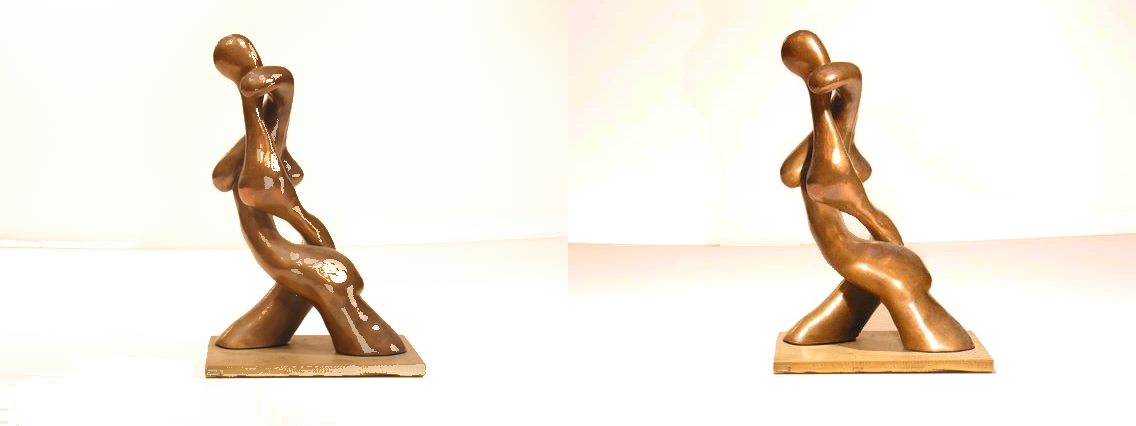

In [ ]:
print("Obraz wyjściowy | Obraz, który chcemy osiągnąć")
imshow(np.concatenate([final_image, result], 1)) 

# Wnioski
Na podstawie wyników w krokach pośrednich można zauważyć, że udało nam się wydobyć z obrazków miejsca, gdzie figurka miała odbite światło. Największy problem stanowiło połączenie uzykanego obrazu (z wyodrębnionymi odbiciami) z obrazem uśrednionym i wybranie takich odbić, które faktycznie chcieliśmy otrzymać na obrazie wyjściowym. Figurka na obrazach wejściowych była nie tylko oświetlona z różnych stron, ale również z różnym natężeniem, dlatego nawet przy głębszej analizie wartości i poprawieniu obrazu średniego był on ciemniejszy od obrazu, który chcieliśmy uzyskać. Problem polegał również na tym, że trudno w jakikolwiek sposób uśredniać wartości odbić z innymi obrazami, ponieważ w miejscu, gdzie jest odbicie, obraz jest bardzo jasny, po uśrednieniu z obrazem na którym nie ma odbicia w danym miejscu taki fragment zaczyna wyglądać nienaturalnie, jest przyszarzony. <br /> Udało nam się nałożyć większe obszary odbicia na wyjściową figurkę, udało nam się również uzyskać tło bez cieni w kolorach zbliżonych do tła na obrazie, który chcieliśmy uzyskać. Nie udało nam się natomiast uzyskać odbić dokładnie w tych miejscach, które posiadają odbicia na obrazie wynikowym. Wynika to z faktu, że zgodnie z filmem na stronie z opisem problemów miejsca odbić były arbitralnie wskazywane przez użytkownika. Nie udało nam się znaleźć żadnych wzorów matematycznych czy metod, które pomogłyby nam w jakiś znaleźć miejsca, które powinny być oświetlone a które nie. 